In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Описание данных
Имеются следующие данные:

date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)

name – имя пользователя

transaction – статус транзакции

minute* – сколько минут прошло с начала дня

Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

Вопрос: сколько в датасете пропущенных значений?

In [2]:
transaction_data = pd.read_csv('transaction_data.csv')

In [3]:
transaction_data

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [4]:
transaction_data.shape

(5315, 3)

In [5]:
transaction_data.dtypes

date           object
name           object
transaction    object
dtype: object

Тип данных во всех колонках - object

In [6]:
transaction_data.isnull().sum()

date           0
name           0
transaction    0
dtype: int64

Пропусков в данных нет

Проверьте, какие значения принимает колонка transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

In [7]:
transaction_count = transaction_data.groupby('transaction', as_index=False) \
                .agg({'name': 'count'}) \
                .rename(columns={'name': 'transaction_count'}) \
                .sort_values('transaction_count', ascending=False)

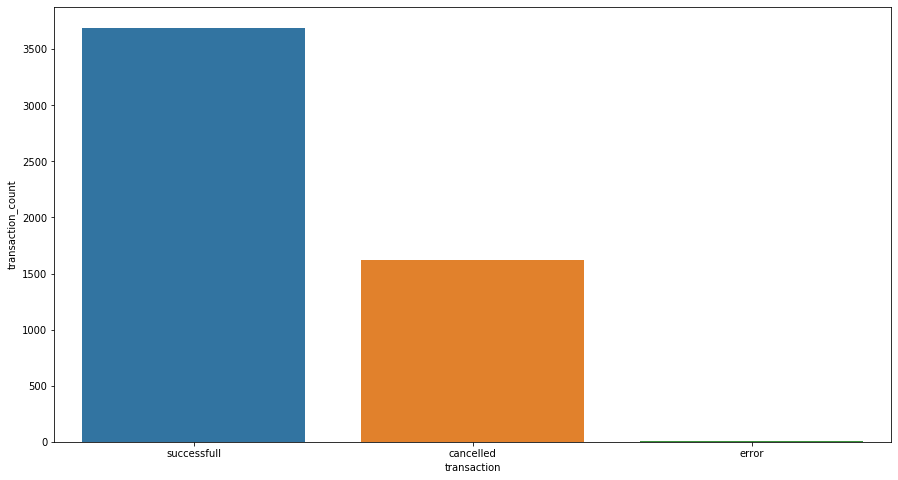

In [8]:
plt.figure(figsize=(15,8))
sns.barplot(x='transaction', y ='transaction_count', data=transaction_count)

In [9]:
transaction_count

,transaction,transaction_count
2,successfull,3692
0,cancelled,1619
1,error,4


Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

по оси x – число транзакций
по оси y – количество пользователей с таким числом транзакций

In [10]:
transaction_name_count = transaction_data.query('transaction == "successfull"') \
                                         .groupby('name', as_index=False) \
                                         .agg({'transaction': 'count'}) \
                                         .rename(columns={'transaction': 'success_transaction_count'})

In [11]:
transaction_name_count.head()

,name,success_transaction_count
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


In [12]:
transaction_name_count.describe()

,success_transaction_count
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


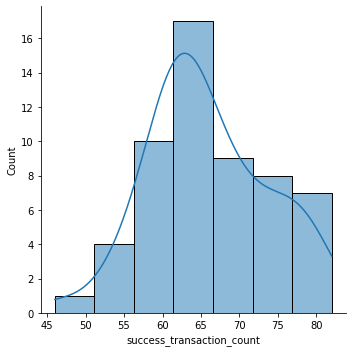

In [13]:
sns.displot(transaction_name_count, x="success_transaction_count", kde=True)

К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:

столбцы – имена пользователей
строки – минута времени осуществления операции (minute)
значения – число совершённых операций
Пропущенные значения заполните нулями.

In [14]:
df = pd.read_csv('transaction_data_updated.csv')

In [15]:
df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [16]:
user_vs_minute_pivot = df.pivot_table('date', index='minute', columns='name', 
                                      aggfunc='count', fill_value=0
                                     )

In [17]:
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3,4,2,3,4,4,2,1,2,2,...,0,3,1,1,4,1,3,0,0,1
1,4,4,0,4,2,5,4,4,4,3,...,4,5,3,2,3,3,0,0,3,2
2,1,2,4,4,2,1,3,2,3,3,...,4,1,3,3,0,1,2,1,3,1
3,3,0,2,0,5,2,1,3,2,2,...,1,5,5,2,4,0,3,4,1,0
4,3,0,0,3,1,1,2,3,2,1,...,1,2,2,1,1,2,2,3,0,1
5,3,0,2,3,1,0,5,3,1,3,...,0,2,3,1,0,0,3,0,2,1
6,4,1,2,2,0,4,5,2,2,2,...,2,1,4,1,2,4,1,2,0,2
7,3,2,1,2,2,3,4,1,1,3,...,3,1,1,2,4,1,0,1,2,2
8,2,4,3,1,0,3,2,1,1,0,...,0,1,0,1,2,4,2,1,1,1


Посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute.

In [18]:
df.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [19]:
df.date = df.date.astype('datetime64')

In [20]:
df = df.assign(true_minute = df.date.dt.minute + df.date.dt.hour*60)

In [21]:
df

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


In [22]:
df.groupby('true_minute', as_index=False) \
  .agg({'transaction':'count'})

,true_minute,transaction
0,0,64
1,1,77
2,2,68
3,3,65
4,4,57
...,...,...
85,85,68
86,86,52
87,87,59
88,88,62
